In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [2]:
bp = pd.read_csv('data/Building_Permits_Issued.csv')

/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bp.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
0,2018002927,Building Residential - New,Single Family Residence,081160R00100CO,01/18/2018,02/12/2018,206150.0,1017A MONROE ST,NASHVILLE,TN,37208,UNIT A 1017 MONROE,"TRISTAR CONSTRUCTION, INC",CARN,CAA01R301,3439281,to construct 1830SF single family residence wi...,19.0,37019400.0,"1017A MONROE ST\nNASHVILLE, TN 37208\n(36.1740..."
1,201617929,Building Use & Occupancy,"Tents, Stages",09215014800,04/19/2016,04/21/2016,2000.0,2300 WEST END AVE,NASHVILLE,TN,37203,N W CORNER WEST END AVE & 23RD AVE N,Music City Tents & Events Llc,CAUO,CAZ06A001,2116751,PERMIT TO ERECT 1:40X85 TENT. THIS TENT IS BEI...,21.0,37016500.0,"2300 WEST END AVE\nNASHVILLE, TN 37203\n(36.14..."
2,2016049270,Building Sign Permit,Sign - Ground / Wall Signs,11909014000,09/14/2016,09/14/2016,15000.0,2802 NOLENSVILLE PIKE,NASHVILLE,TN,37211,PT LOT 2 PATTERSON SUB,BOZMAN SIGN CO INC,CASN,CAZ02A001,3277064,to install replacement signage for existing fr...,16.0,37017300.0,"2802 NOLENSVILLE PIKE\nNASHVILLE, TN 37211\n(3..."
3,2016029907,Building Residential - Roofing / Siding,Duplex,075150A13900CO,06/20/2016,06/20/2016,17648.0,139 STONERS GLEN DR,HERMITAGE,TN,37076,UNIT 139 STONERS GLEN PHASE 1,"MR ROOF NASHVILLE, LLC",CARK,CAA02R302,3251947,Remove existing shingles and replace with new ...,12.0,37015623.0,"139 STONERS GLEN DR\nHERMITAGE, TN 37076\n(36...."
4,201533533,Building Residential - Tenant Finish Out,"Multifamily, Tri-Plex, Quad, Apartments",10404024100,08/07/2015,11/17/2015,542696.0,70 MUSIC SQ W,NASHVILLE,TN,37203,LOT 1 O.B. HAYES FIRST PLAN CONSOLIDATION OF L...,Construction Enterprises Inc,CART,CAA03R398,2061885,SEE MASTER PERMIT T2015-26520...T.....GRAND AV...,19.0,37016400.0,"70 MUSIC SQ W\nNASHVILLE, TN 37203\n(36.147074..."


In [4]:
building = bp.loc[bp['Permit Type Description'].str.contains('Building')]

In [5]:
new_building = building.loc[building['Permit Type Description'].str.contains('New')]

In [6]:
demolition = bp.loc[bp['Permit Type Description'].str.contains('Demolition')]

In [7]:
res_demolition = demolition.loc[demolition['Permit Subtype Description'].str.contains('Residential')]

In [8]:
merged = pd.merge(new_building, res_demolition, on= 'Address')

In [9]:
bp.loc[bp['Permit Subtype'].isin(['CAZ01A001', 'CAZ01A002'])];

In [10]:
bp.loc[bp['Permit Subtype'] == 'CAZ01A001']

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
23,201543896,Building Demolition Permit,Demolition Permit - Residential,10509038300,10/08/2015,10/08/2015,4000.0,914 ACKLEN AVE,NASHVILLE,TN,37203,LOT 2 WAVERLY PLACE RESUB PT. LOT 31,Graham Construction Of Tennessee Llc,CADM,CAZ01A001,2075785,Work on this demolition permit must commence w...,17.0,37016200.0,"914 ACKLEN AVE\nNASHVILLE, TN 37203\n(36.13354..."
30,201620413,Building Demolition Permit,Demolition Permit - Residential,08116022300,05/03/2016,05/03/2016,5000.0,918 SCOVEL ST,NASHVILLE,TN,37208,LOT 55 MCGAVOCK TOWN NORTH NASHVILLE,K Jordan Construction Llc,CADM,CAZ01A001,2120019,Work on this demolition permit must commence w...,19.0,37019400.0,"918 SCOVEL ST\nNASHVILLE, TN 37208\n(36.173632..."
36,201614474,Building Demolition Permit,Demolition Permit - Residential,13102006500,03/31/2016,03/31/2016,7500.0,1923 WARFIELD DR,NASHVILLE,TN,37215,LOT 21 COLONIAL HGTS,Cat3 Restoration Llc,CADM,CAZ01A001,2112314,to demolish exisitng single family residence. ...,25.0,37017901.0,"1923 WARFIELD DR\nNASHVILLE, TN 37215\n(36.102..."
37,2016039565,Building Demolition Permit,Demolition Permit - Residential,10200007600,08/03/2016,08/03/2016,21000.0,3985 OLD HICKORY BLVD,NASHVILLE,TN,37218,S/S OF OLD HICKORY BV E OF HYDES FERRY PK,SELF CONTRACTOR COMMERCIAL (SEE APPLICANT INFO...,CADM,CAZ01A001,3264459,to demolish existing single family residence. ...,1.0,37013100.0,"3985 OLD HICKORY BLVD\nNASHVILLE, TN 37218\n(3..."
47,2017033484,Building Demolition Permit,Demolition Permit - Residential,15900008000,05/19/2017,05/19/2017,10000.0,5610 GRANNY WHITE PIKE,BRENTWOOD,TN,37027,LOTS 1 & 2 GRANNY WHITE PARTNERS,"URBAN DEVELOPMENT GROUP, LLC",CADM,CAZ01A001,3368029,to demolish existing residence. not to be bur...,34.0,37018700.0,"5610 GRANNY WHITE PIKE\nBRENTWOOD, TN 37027\n(..."
61,2016066262,Building Demolition Permit,Demolition Permit - Residential,10501054100,11/29/2016,11/29/2016,3000.0,1004 SOUTHSIDE AVE,NASHVILLE,TN,37203,LOT 38 SOUTHSIDE PARK EST SEC 1,"MILLER, B. RECYCLING, LLC",CADM,CAZ01A001,3298215,Work on this demolition permit must commence w...,17.0,37016200.0,"1004 SOUTHSIDE AVE\nNASHVILLE, TN 37203\n(36.1..."
67,2016051094,Building Demolition Permit,Demolition Permit - Residential,08400000600,09/22/2016,09/22/2016,2500.0,0 EASTLAND AVE,NASHVILLE,TN,37206,RESERVED PARCEL TIFFANY TERRACE,FRITSCH DESIGN BUILD LLC,CADM,CAZ01A001,3279260,THIS PERMIT IS TO DEMOLISH EXISTING BARN. NOT...,6.0,37011600.0,"0 EASTLAND AVE\nNASHVILLE, TN 37206\n"
82,2016025907,Building Demolition Permit,Demolition Permit - Residential,10505038400,06/01/2016,06/02/2016,8000.0,1014 ARGYLE AVE,NASHVILLE,TN,37203,LOT 8 BRANSFORD RLTY CO SUB JONES & DUDLEY,LANDMARK HOMES OF TN INC,CADM,CAZ01A001,3246625,Demolition of building on this lot,17.0,37016200.0,"1014 ARGYLE AVE\nNASHVILLE, TN 37203\n(36.1375..."
105,2018000996,Building Demolition Permit,Demolition Permit - Residential,072164F90000CO,01/05/2018,01/05/2018,4000.0,1507C WAYNE DR,NASHVILLE,TN,37206,COMMON AREA 1507 WAYNE DRIVE TOWNHOMES,"CHRISTIAN, MICHAEL J HOUSEMOVING",CADM,CAZ01A001,3436815,to demolish existing residence. not to be bur...,7.0,37011600.0,"1507C WAYNE DR\nNASHVILLE, TN 37206\n(36.1938,..."
120,2016031224,Building Demolition Permit,Demolition Permit - Residential,08203030300,06/24/2016,06/24/2016,4000.0,1000 PENNOCK AVE,NASHVILLE,TN,37207,PT LOT 10 F E MANN PLAN,"JAMAAR GROUP CONSTRUCTION, LLC",CADM,CAZ01A001,3253609,to demolish existing residence. not to be bur...,5.0,37011800.0,"1000 PENNOCK AVE\nNASHVILLE, TN 37207\n(36.188..."


In [11]:
new_commercial = ['CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA05R202']

In [12]:
new_residential = ['CAA01R301', 'CAA02R302', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA04R301', 'CAA05R202', 'CAA08R301', 'CAA10R301', 'CAZ08A001', 'DPLX2CNDO']

In [13]:
matched = pd.merge(bp.loc[bp['Permit Subtype'].isin(['CAZ01A001', 'CAZ01A002'])], new_building.loc[new_building['Permit Subtype'].isin(new_commercial + new_residential)], on = 'Address')

In [14]:
matched.shape

(1060, 39)

In [175]:
matched.loc[37]

Permit #_x                                                             2017034137
Permit Type Description_x                              Building Demolition Permit
Permit Subtype Description_x                      Demolition Permit - Residential
Parcel_x                                                              10501022100
Date Entered_x                                                         05/23/2017
Date Issued_x                                                          06/08/2017
Const. Cost_x                                                                2500
Address                                                           1506EDGEHILLAVE
City_x                                                                  NASHVILLE
State_x                                                                        TN
Zip_x                                                                       37212
Subdivision/Lot_x                                PT LOT 98 99 BOYD ADDN SUB AMENT
Contact_x       

In [16]:
sf2009 = pd.read_csv('data/2009SINGLEFAMILYSF.txt')
sf2013 = pd.read_csv('data/2013SINGLEFAMILYSF.txt')
sf2017 = pd.read_csv('data/2017SINGLEFAMILYSF.txt')

In [17]:
sf = pd.merge(pd.merge(sf2009, sf2013, on = 'AddressFullAddress'), sf2017, on = 'AddressFullAddress')

In [18]:
sf2009.head()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,FinishedArea
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,1920.0
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,1464.0
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,3539.0
3,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,736.0
4,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,1301.0


In [19]:
dummy = pd.merge(matched, sf, left_on = 'Address', right_on= 'AddressFullAddress')

In [20]:
dummy.shape

(41, 70)

In [21]:
sf.shape

(197261, 31)

In [22]:
matched.shape

(1060, 39)

In [23]:
sf.loc[sf.AddressFullAddress == '1014  ARGYLE AVE']

,APN_x,DistrictCode_x,Council District_x,AddressFullAddress,AddressCity_x,AddressPostalCode_x,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,...,APN,DistrictCode,Council District,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea


In [24]:
matched.Address = matched.Address.str.replace(' ', '')

In [25]:
sf.AddressFullAddress = sf.AddressFullAddress.str.replace(' ', '')

In [26]:
dummy = pd.merge(matched, sf, left_on = 'Address', right_on= 'AddressFullAddress')

In [27]:
dummy.shape

(629, 70)

In [174]:
dummy.loc[35]

Permit #_x                                                             2016026644
Permit Type Description_x                              Building Demolition Permit
Permit Subtype Description_x                      Demolition Permit - Residential
Parcel_x                                                              08209003100
Date Entered_x                                                         06/03/2016
Date Issued_x                                                          04/28/2017
Const. Cost_x                                                                1500
Address                                                               13107THAVEN
City_x                                                                  NASHVILLE
State_x                                                                        TN
Zip_x                                                                       37208
Subdivision/Lot_x                           LOT 21 NORTH NASHVILLE REAL ESTATE CO
Contact_x       

In [29]:
sf['Pct_Change'] = (sf['2017 TOTAL APPR'] - sf['2013 TOTAL APPR']) / sf['2013 TOTAL APPR']

In [30]:
sf.Pct_Change.describe()

count    197261.000000
mean          0.428442
std           0.441329
min          -0.967016
25%           0.229383
50%           0.346114
75%           0.487901
max          58.333333
Name: Pct_Change, dtype: float64

In [31]:
dummy['Pct_Change'] = (dummy['2017 TOTAL APPR'] - dummy['2013 TOTAL APPR']) / dummy['2013 TOTAL APPR']

In [32]:
dummy.Pct_Change.describe()

count    629.000000
mean       1.438354
std        1.716807
min       -0.819005
25%        0.305965
50%        0.854127
75%        2.255941
max       12.150456
Name: Pct_Change, dtype: float64

In [33]:
dummy.columns

Index(['Permit #_x', 'Permit Type Description_x',
       'Permit Subtype Description_x', 'Parcel_x', 'Date Entered_x',
       'Date Issued_x', 'Const. Cost_x', 'Address', 'City_x', 'State_x',
       'Zip_x', 'Subdivision/Lot_x', 'Contact_x', 'Permit Type_x',
       'Permit Subtype_x', 'IVR Trk#_x', 'Purpose_x', 'Council Dist_x',
       'Census Tract_x', 'Mapped Location_x', 'Permit #_y',
       'Permit Type Description_y', 'Permit Subtype Description_y', 'Parcel_y',
       'Date Entered_y', 'Date Issued_y', 'Const. Cost_y', 'City_y', 'State_y',
       'Zip_y', 'Subdivision/Lot_y', 'Contact_y', 'Permit Type_y',
       'Permit Subtype_y', 'IVR Trk#_y', 'Purpose_y', 'Council Dist_y',
       'Census Tract_y', 'Mapped Location_y', 'APN_x', 'DistrictCode_x',
       'Council District_x', 'AddressFullAddress', 'AddressCity_x',
       'AddressPostalCode_x', '2009 LAND', '2009 IMPR', '2009 TOTAL APPR',
       '2009 TOTAL ASSD', 'FinishedArea_x', 'APN_y', 'DistrictCode_y',
       'Council Distric

In [34]:
dummy['SF_Change'] = (dummy['FinishedArea'] - dummy['FinishedArea_y']) / dummy['FinishedArea_y']

In [35]:
dummy.SF_Change.describe()

count    628.000000
mean       0.763825
std        1.168183
min       -1.000000
25%        0.000000
50%        0.871765
75%        1.509888
max        5.242424
Name: SF_Change, dtype: float64

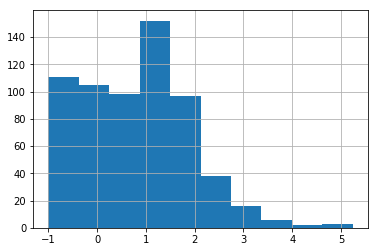

In [36]:
dummy.SF_Change.hist()

In [41]:
tax_2016 = pd.read_csv('data/tax_2016.csv')

In [46]:
tax_2016.loc[tax_2016.STATE == 'TN']

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
145648,47,TN,0,1,1157130,744180,155040,238430,530230,1712970,...,558600,522223,0,0,0,0,100290,89421,1001430,2236485
145649,47,TN,0,2,759390,357060,217720,161400,347670,1486900,...,629270,1669930,0,0,0,0,104420,176829,646580,1784387
145650,47,TN,0,3,397080,129260,216320,42020,199330,881810,...,382830,2139366,0,0,0,0,87960,222529,302820,851164
145651,47,TN,0,4,241840,43660,182240,12240,125080,607500,...,239840,2147654,20,4,0,0,60840,201452,174980,577251
145652,47,TN,0,5,299360,32690,255470,7440,163150,810660,...,298430,5663671,1010,308,120,103,108580,617348,178600,739209
145653,47,TN,0,6,95980,7300,84010,1090,70060,276890,...,95910,12461171,51840,127030,51390,214690,46560,1412055,33300,632320
145654,47,TN,37010,1,820,580,160,70,370,1120,...,360,307,0,0,0,0,90,73,630,979
145655,47,TN,37010,2,470,210,160,70,200,950,...,380,1066,0,0,0,0,70,119,390,1208
145656,47,TN,37010,3,360,80,230,40,170,880,...,340,1903,0,0,0,0,90,315,260,864
145657,47,TN,37010,4,310,40,260,20,160,880,...,300,2473,0,0,0,0,80,211,230,883


In [98]:
sf.head()

,APN_x,DistrictCode_x,Council District_x,AddressFullAddress,AddressCity_x,AddressPostalCode_x,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,...,DistrictCode,Council District,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea,Pct_Change
0,00200000300,RT,10,1012OLDBUCKHILLRD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,...,RT,10,GOODLETTSVILLE,37072,46700,88700,135400,33850,1920.0,0.187719
1,00200000700,RT,10,1109HIGHLANDAVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,...,RT,10,GOODLETTSVILLE,37072,40100,109700,149800,37450,1464.0,0.096633
2,00200001001002,GSD,10,0SPRINGFIELDHWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,...,GSD,10,GOODLETTSVILLE,37072,18000,185100,203100,50775,3539.0,0.171280
3,00200001400001,RT,10,133BEASTENDRD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,...,RT,10,GOODLETTSVILLE,37072,30000,34100,64100,16025,736.0,0.082770
4,00200001600001,RT,10,141BEASTENDRD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,...,RT,10,GOODLETTSVILLE,37072,18300,79500,97800,24450,1301.0,0.178313


In [99]:
print(sorted(sf['Council District'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [100]:
sf.DistrictCode.unique()

array(['RT  ', 'GSD ', 'GO  ', 'USD ', 'FH  ', 'OH  ', 'CBID', 'GBID',
       'BH  ', 'BM  '], dtype=object)

In [101]:
council_district = gpd.read_file('data/Council_District_Outlines.geojson')

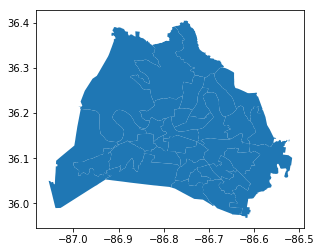

In [102]:
council_district.plot()

In [103]:
zip_codes = gpd.read_file('data/Zip_Codes.geojson')

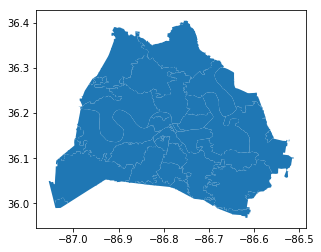

In [104]:
zip_codes.plot()

In [107]:
zc_db = gpd.sjoin(council_district, zip_codes, how="inner", op='intersects')

In [111]:
zc_db.groupby('district').zip.count()

district
1      9
10     4
11     3
12     4
13     6
14     4
15     7
16     4
17     5
18     7
19    11
2      4
20     3
21     6
22     3
23     4
24     3
25     5
26     4
27     3
28     3
29     4
3      6
30     2
31     7
32     2
33     6
34     6
35     9
4      9
5      6
6      6
7      4
8      3
9      4
Name: zip, dtype: int64

In [115]:
zip_code_list = list(zip_codes.zip.unique())

In [118]:
tax_2016 = tax_2016.loc[tax_2016.zipcode.isin(zip_code_list)]

In [119]:
tax_2016.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
145666,47,TN,37013,1,16260,10580,1930,3460,6890,25320,...,8860,9518,0,0,0,0,2110,2291,13750,32237
145667,47,TN,37013,2,14900,7470,3260,3670,5670,30520,...,11970,33215,0,0,0,0,2180,4100,12670,36063
145668,47,TN,37013,3,6040,2310,2580,960,2380,13670,...,5730,32050,0,0,0,0,1290,3598,4710,13191
145669,47,TN,37013,4,2670,630,1760,230,1100,6620,...,2640,24401,0,0,0,0,660,2531,1980,6320
145670,47,TN,37013,5,2270,340,1820,100,1050,5920,...,2270,40013,0,0,0,0,880,4789,1370,5129


In [126]:
by_return = tax_2016.pivot(index = 'zipcode', columns = 'agi_stub', values = 'N1')

In [127]:
by_return.head()

agi_stub,1,2,3,4,5,6
zipcode,,,,,,
37013,16260,14900,6040,2670,2270,210
37015,2960,2460,1350,770,700,120
37027,6420,3240,2590,2160,5970,6510
37064,7240,4550,2960,2480,5900,3230
37072,4890,4120,2270,1440,1730,390


In [135]:
by_return['Total'] = 12.5 * by_return[1] + 37.5 * by_return[2] + 62.5 * by_return[3] + 87.5 * by_return[4] + 150 * by_return[5] + 250 * by_return[6]

In [136]:
by_return.head()

agi_stub,1,2,3,4,5,6,Total
zipcode,,,,,,,
37013,16260,14900,6040,2670,2270,210,1766125.0
37015,2960,2460,1350,770,700,120,416000.0
37027,6420,3240,2590,2160,5970,6510,3075625.0
37064,7240,4550,2960,2480,5900,3230,2355625.0
37072,4890,4120,2270,1440,1730,390,840500.0


In [140]:
by_return['Household'] = by_return[[1, 2, 3, 4, 5, 6]].sum(axis = 1)

In [145]:
# Approximate per household income by zip code
by_return['Per_Household'] = by_return.Total / by_return.Household

In [146]:

by_return.nsmallest(10, 'Per_Household')

agi_stub,1,2,3,4,5,6,Total,Household,Per_Household
zipcode,,,,,,,,,
37210,3560,2120,770,320,220,40,243125.0,7030,34.583926
37207,9170,5740,2060,840,720,70,657625.0,18600,35.356183
37217,6910,5570,1950,700,530,50,570375.0,15710,36.306493
37115,7980,6280,2180,900,670,100,675750.0,18110,37.313639
37218,3220,2090,820,420,370,60,277125.0,6980,39.702722
37228,400,330,140,40,60,0,38625.0,970,39.819588
37208,4260,2300,900,400,500,170,348250.0,8530,40.826495
37013,16260,14900,6040,2670,2270,210,1766125.0,42350,41.703070
37086,6230,5610,2430,1220,870,70,694875.0,16430,42.293061


In [148]:
sf2017

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea
0,103020C01300CO,USD,24,276 WHITE BRIDGE PIKE 13,NASHVILLE,37209,10000,39600,49600,19840,567.00
1,103020C01400CO,USD,24,276 WHITE BRIDGE PIKE 14,NASHVILLE,37209,10000,45000,55000,13750,567.00
2,103020C01500CO,USD,24,276 WHITE BRIDGE PIKE 15,NASHVILLE,37209,10000,39600,49600,19840,567.00
3,103020C01600CO,USD,24,276 WHITE BRIDGE PIKE 16,NASHVILLE,37209,10000,45000,55000,13750,567.00
4,103020C01700CO,USD,24,276 WHITE BRIDGE PIKE 17,NASHVILLE,37209,10000,45000,55000,22000,567.00
5,103020C01800CO,USD,24,276 WHITE BRIDGE PIKE 18,NASHVILLE,37209,10000,39600,49600,19840,567.00
6,103020C01900CO,USD,24,276 WHITE BRIDGE PIKE 19,NASHVILLE,37209,10000,39600,49600,19840,567.00
7,103020C02000CO,USD,24,276 WHITE BRIDGE PIKE 20,NASHVILLE,37209,10000,39600,49600,19840,567.00
8,103020C02100CO,USD,24,276 WHITE BRIDGE PIKE 21,NASHVILLE,37209,10000,39600,49600,19840,567.00
9,103020C02200CO,USD,24,276 WHITE BRIDGE PIKE 22,NASHVILLE,37209,10000,45000,55000,22000,567.00


In [158]:
sf2017['Mortgage_Per_Month'] = sf2017['2017 TOTAL APPR'] * 0.05/12 *(1+0.05/12)**(30*12) / ((1+0.05/12)**(30*12) -1)

In [166]:
sf2017['Mortgage_Per_Year'] = 12* sf2017['Mortgage_Per_Month']

In [167]:
sf2017.head()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea,Mortgage_Per_Month,Mortgage_Per_Year
0,103020C01300CO,USD,24,276 WHITE BRIDGE PIKE 13,NASHVILLE,37209,10000,39600,49600,19840,567.0,266.263525,3195.162300
1,103020C01400CO,USD,24,276 WHITE BRIDGE PIKE 14,NASHVILLE,37209,10000,45000,55000,13750,567.0,295.251893,3543.022712
2,103020C01500CO,USD,24,276 WHITE BRIDGE PIKE 15,NASHVILLE,37209,10000,39600,49600,19840,567.0,266.263525,3195.162300
3,103020C01600CO,USD,24,276 WHITE BRIDGE PIKE 16,NASHVILLE,37209,10000,45000,55000,13750,567.0,295.251893,3543.022712
4,103020C01700CO,USD,24,276 WHITE BRIDGE PIKE 17,NASHVILLE,37209,10000,45000,55000,22000,567.0,295.251893,3543.022712


In [186]:
# Number of affordable single family homes by zipcode
# REMOVE HOUSES THAT DON'T EXIST!
sf2017.loc[sf2017.Mortgage_Per_Year < 12240].groupby('AddressPostalCode').AddressFullAddress.count().sort_values()

AddressPostalCode
0            1
37064        1
37086        1
37201        6
37122       20
37220       31
37143       76
37135      111
37015      118
37219      202
37204      227
37027      365
37203      600
37215      636
37212      651
37080      661
37205      680
37189      689
37206     1158
37216     1430
37072     2328
37210     2522
37208     2835
37221     2844
37138     3099
37209     3115
37218     3528
37217     5326
37076     6118
37214     6565
37115     7591
37207     7659
37211     8876
37013    15341
Name: AddressFullAddress, dtype: int64

In [185]:
by_return.loc[37013]

agi_stub
1                1.626000e+04
2                1.490000e+04
3                6.040000e+03
4                2.670000e+03
5                2.270000e+03
6                2.100000e+02
Total            1.766125e+06
Household        4.235000e+04
Per_Household    4.170307e+01
Name: 37013, dtype: float64